In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [2]:
df=load_diabetes(as_frame=True).frame

In [3]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
x=df.drop('target',axis=1)
y=df['target']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred=model.predict(x_test)

In [8]:
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
print(f"train mse",mean_squared_error(y_train,y_pred_train))
print(f"train r2",r2_score(y_train,y_pred_train))
print(f"test mse",mean_squared_error(y_test,y_pred))
print(f"test r2",r2_score(y_test,y_pred))

train mse 0.0
train r2 1.0
test mse 6223.165413533835
test r2 -0.1527993008238102


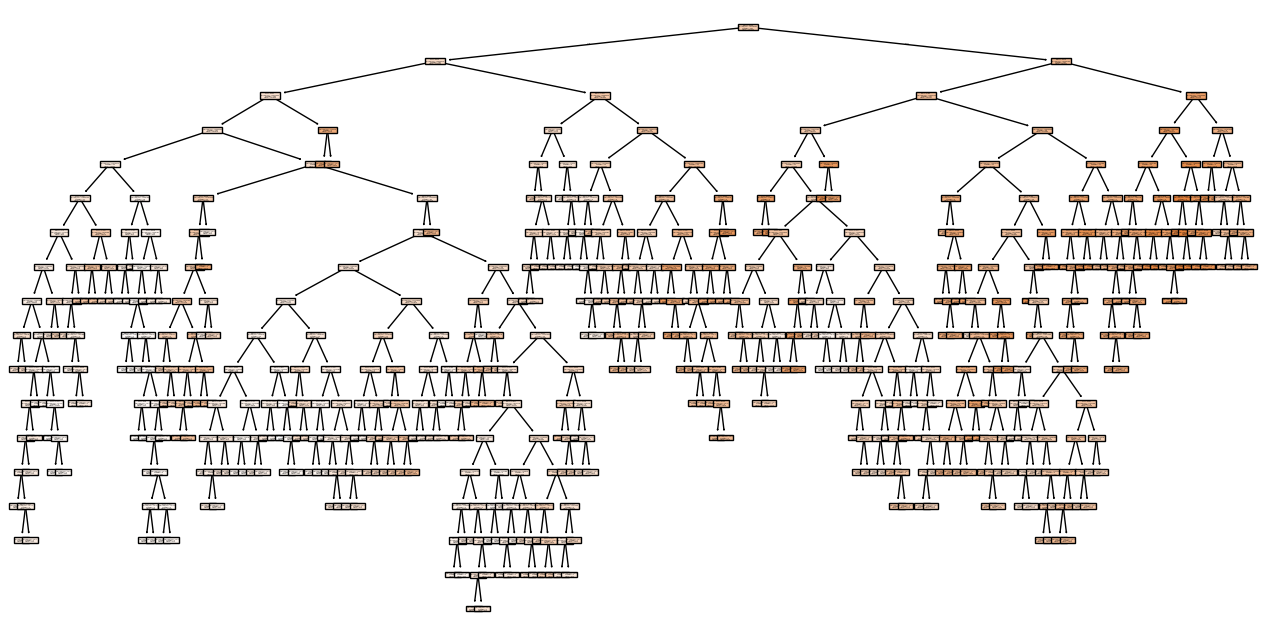

<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,8))
plot_tree(
    model,
    feature_names=x.columns,
    filled=True
)
plt.show()
plt.tight_layout()

In [12]:
#pre_pruning

from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=4,min_samples_leaf=20)
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred=model.predict(x_test)
print(f"train mse",mean_squared_error(y_train,y_pred_train))
print(f"train r2",r2_score(y_train,y_pred_train))
print(f"test mse",mean_squared_error(y_test,y_pred))
print(f"test r2",r2_score(y_test,y_pred))


train mse 2838.1417153349753
train r2 0.538384577844953
test mse 3088.4126494197785
test r2 0.42789244599481113


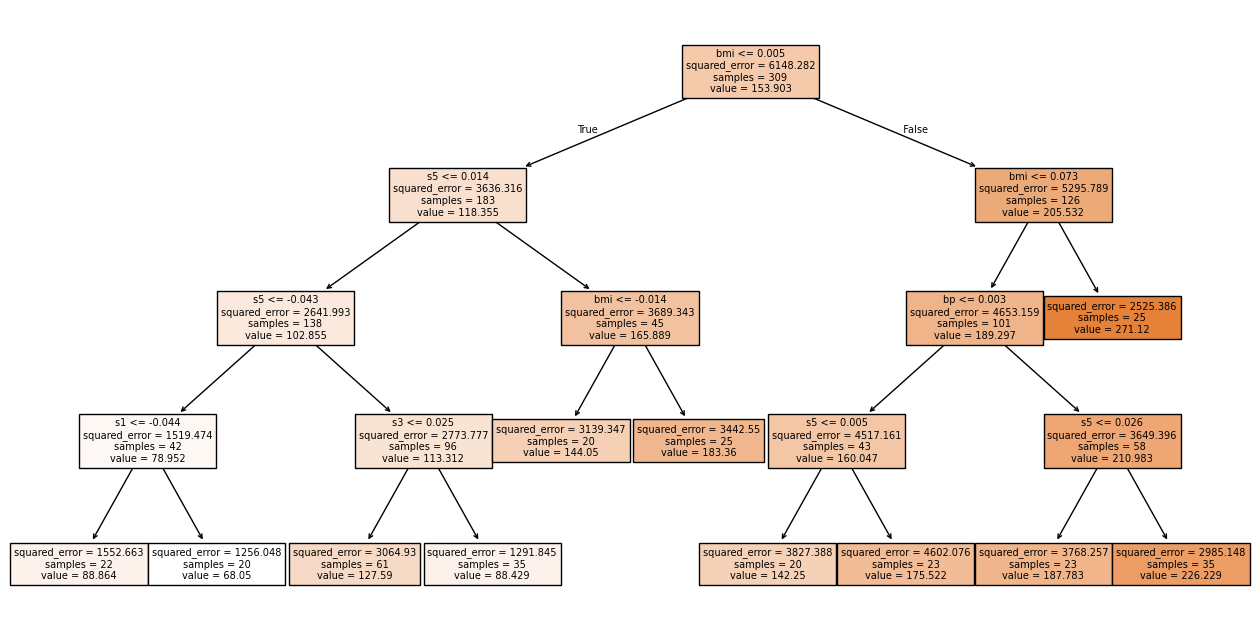

<Figure size 640x480 with 0 Axes>

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,8))
plot_tree(
    model,
    feature_names=x.columns,
    filled=True
)
plt.show()
plt.tight_layout()

In [25]:
#pre_pruning
from sklearn.model_selection import GridSearchCV
para_grid={
    'max_depth':[4,5,6,7,8,9],
    
    'min_samples_leaf':[20,25,30,35,40,45]



}
model=DecisionTreeRegressor()
reg=GridSearchCV(model,
                param_grid=para_grid,
                cv=6,
                scoring='r2')
reg.fit(x,y)
print('best param:',reg.best_params_)
print('best param:',reg.best_score_)


best param: {'max_depth': 4, 'min_samples_leaf': 25}
best param: 0.38298401508267577


In [26]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=4,min_samples_leaf=25)
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred=model.predict(x_test)
print(f"train mse",mean_squared_error(y_train,y_pred_train))
print(f"train r2",r2_score(y_train,y_pred_train))
print(f"test mse",mean_squared_error(y_test,y_pred))
print(f"test r2",r2_score(y_test,y_pred))

train mse 2952.829227404435
train r2 0.5197309905297729
test mse 3140.4149638057584
test r2 0.41825936898628335
